In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [2]:
path1 = '/Users/kimtaehyeong/Desktop/01_앞면_윗니 오른쪽'
os.chdir(path1)
files1 = os.listdir(path1) # 파일 폴더명 반환

data = []
for file in files1:
    f = cv2.imread(file)
    data.append(f)


## Train, Valid, Test = 5:3:2 로 나누기

In [3]:
# train, test 나누기
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, 
                               test_size=0.2,
                               shuffle=True,
                               random_state=42)

In [4]:
print(len(train))
print(len(test))

2149
538


In [5]:
train, valid = train_test_split(train,
                               test_size = 3/8,
                               shuffle = True,
                               random_state =42)

In [6]:
print('Train : ', len(train))
print('Valid : ',len(valid))
print('Test : ',len(test))

Train :  1343
Valid :  806
Test :  538


In [7]:
# 트레인에 이상치 추가
path1 = '/Users/kimtaehyeong/Desktop/아웃라이어'
os.chdir(path1)
files1 = os.listdir(path1)

for file in files1:
    f = cv2.imread(file)
    train.append(f)

In [8]:
path2 = '/Users/kimtaehyeong/Desktop/테스트 이상치'
os.chdir(path2)
files2 = os.listdir(path2)

for file in files2:
    f = cv2.imread(file)
    test.append(f)

In [9]:
path3 = '/Users/kimtaehyeong/Desktop/검증 이상치'
os.chdir(path3)
files3 = os.listdir(path3)

for file in files3:
    f = cv2.imread(file)
    valid.append(f)

In [10]:
print('Train: ', len(train))
print('Valid: ', len(valid))
print('Test: ', len(test))

Train:  1349
Valid:  813
Test:  550


In [11]:
def train_visual(data_set) :
    plt.figure(figsize = (10,5))
    
    for i in range(1, 10+1) :
        plt.subplot(2, 5, i)
        plt.imshow(cv2.cvtColor(data_set[i], cv2.COLOR_BGR2RGB))
        plt.title(f'normal image {i} ' )
        plt.axis('off')
    
    # visualize outler in data set
    plt.figure(figsize = (10,7))
    for i in range(1, 6+1) :
        plt.subplot(2,3,i)
        plt.imshow(cv2.cvtColor(data_set[-i], cv2.COLOR_BGR2RGB))
        plt.title(f'outlier image {i} ')
        plt.axis('off')
        
    plt.show()

In [12]:
def valid_visual(data_set) :
    plt.figure(figsize = (10,5))
    
    for i in range(1, 10+1) :
        plt.subplot(2, 5, i)
        plt.imshow(cv2.cvtColor(data_set[i], cv2.COLOR_BGR2RGB))
        plt.title(f'normal image {i} ' )
        plt.axis('off')
    
    # visualize outler in data set
    plt.figure(figsize = (10,7))
    for i in range(1, 7+1) :
        plt.subplot(4,4,i)
        plt.imshow(cv2.cvtColor(data_set[-i], cv2.COLOR_BGR2RGB))
        plt.title(f'outlier image {i} ')
        plt.axis('off')
        
    plt.show()

In [13]:
def test_visual(data_set) :
    plt.figure(figsize = (10,5))
    
    for i in range(1, 10+1) :
        plt.subplot(2, 5, i)
        plt.imshow(cv2.cvtColor(data_set[i], cv2.COLOR_BGR2RGB))
        plt.title(f'normal image {i} ' )
        plt.axis('off')
    
    # visualize outler in data set
    plt.figure(figsize = (10,7))
    for i in range(1, 12+1) :
        plt.subplot(4,3,i)
        plt.imshow(cv2.cvtColor(data_set[-i], cv2.COLOR_BGR2RGB))
        plt.title(f'outlier image {i} ')
        plt.axis('off')
        
    plt.show()

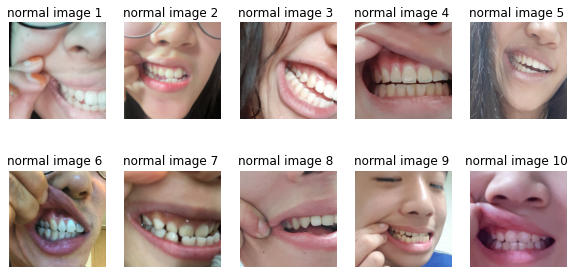

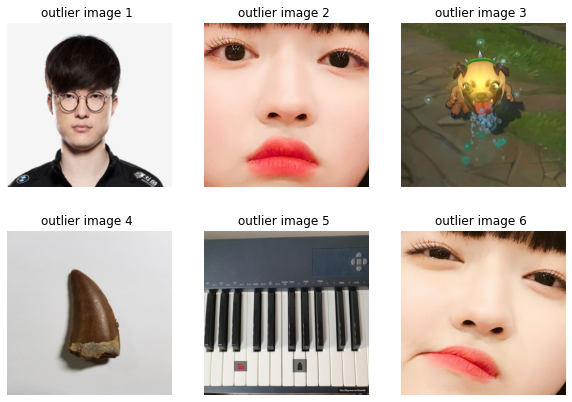

In [14]:
train_visual(train)

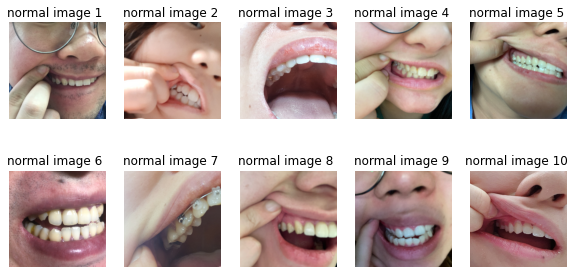

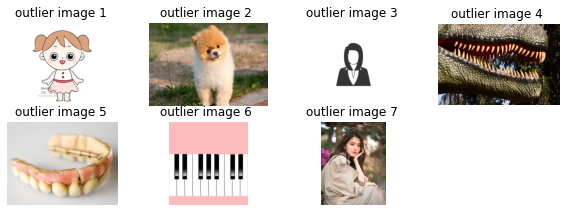

In [15]:
valid_visual(valid)

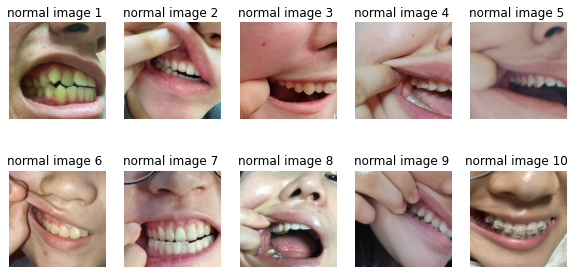

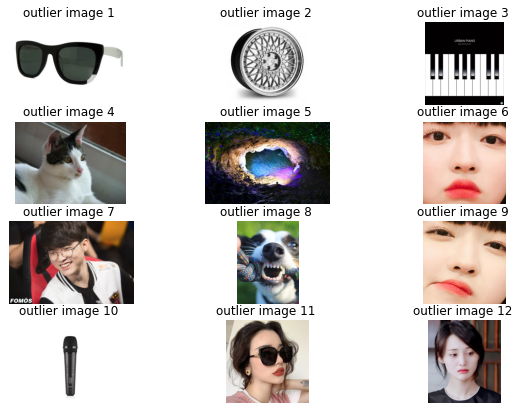

In [16]:
test_visual(test)

In [17]:
valid2 = valid.copy()
test2 = test.copy()

# 이미지 전처리

In [18]:
# image resize
def image_resize(data_set, n_pixel):
    # create empty list
    resized_list = []
    # resize to n pixel 
    for i in range(len(data_set)):
        resized = cv2.resize(data_set[i], dsize=(n_pixel,n_pixel), interpolation=cv2.INTER_CUBIC)
        resized_list.append(resized)
        
    return resized_list

In [19]:
train = image_resize(train, 224)
valid = image_resize(valid, 224)
test = image_resize(test, 224)


In [20]:
train = np.array(train)
valid = np.array(valid)
test = np.array(test)

In [21]:
train = train/255
valid = valid/255
test = test/255

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.models import Model
from keras import models
from keras.applications.vgg16 import VGG16
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input 
import numpy as np
from numpy import expand_dims
np.random.seed(42)
tf.random.set_seed(42)

In [23]:
model = VGG16(weights='imagenet')
model.summary()

2021-11-08 18:43:46.334548: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-08 18:43:46.335287: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (N

In [24]:
layers = [2,5,9,13,17]

base_model = Model(inputs=model.inputs, outputs=model.layers[9+1].output)
base_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [25]:
# feature map 추출
train_feature = base_model.predict(train)
valid_feature = base_model.predict(valid)
test_feature = base_model.predict(test)

2021-11-08 18:43:53.831649: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-08 18:43:53.853274: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-11-08 18:43:54.025553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [26]:
# GAP 전 threshold로 불필요한 feature 버리기

def threshold(data_set) :
    for i in tqdm(range(len(data_set))):
        fmap = data_set[i]
        for j in range(data_set.shape[3]):
            threshold = fmap[:,:,j].mean()*1.3
            for a in range(fmap.shape[0]):
                for b in range(fmap.shape[1]):
                    if fmap[a,b,j] < threshold:
                        fmap[a,b,j] = 0
    return data_set

In [27]:
train_threshold = threshold(train_feature)
valid_threshold = threshold(valid_feature)
test_threshold = threshold(test_feature)


100%|█████████████████████████████████████████| 550/550 [02:00<00:00,  4.57it/s]


In [28]:
model_gap = models.Sequential()
model_gap.add(GlobalAveragePooling2D())

In [29]:
train_gap = model_gap.predict(train_threshold)
valid_gap = model_gap.predict(valid_threshold)
test_gap = model_gap.predict(test_threshold)

2021-11-08 18:54:49.319648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [30]:
print(train_gap.shape)
print(valid_gap.shape)
print(test_gap.shape)

(1349, 256)
(813, 256)
(550, 256)


In [31]:
train_2d = np.array(train_gap)
valid_2d = np.array(valid_gap)
test_2d = np.array(test_gap)

In [32]:
train_2d = train_2d.reshape(train_2d.shape[0],-1)
valid_2d = valid_2d.reshape(valid_2d.shape[0],-1)
test_2d = test_2d.reshape(test_2d.shape[0],-1)

In [33]:
# 다양한 하이퍼파라미터 조합으로 성능 비교
estimator_values = [50,60,70,80,90,100,200,300,500]
sample_values = ['auto',10,30,50,100,200,300,500]
feature_values = [3,5,7,8,9,10,15,20,30]

# isolation forest modeling
from sklearn.ensemble import IsolationForest

predictions = []

for estimator in tqdm(estimator_values):
    for sample in sample_values:
        for feature in feature_values:
            iforest = IsolationForest(n_estimators=estimator, # number of itree
                                      max_samples=sample,     # number of sample
                                      max_features=feature,   # number of feature
                                      contamination='auto',     # proportion of outliers in train set
                                      random_state=42)
            iforest.fit(train_2d)
            # valid data로 predict
            pred = iforest.predict(valid_2d)
            predictions.append(pred)

100%|█████████████████████████████████████████████| 9/9 [01:22<00:00,  9.22s/it]


In [34]:
# 조합별 모델링 결과 보기
import pandas as pd
combi_result = pd.DataFrame(predictions).T

In [35]:
# make name of each columns
estimators_str = [str(estimator) for estimator in estimator_values]
samples_str = [str(sample) for sample in sample_values]
features_str = [str(feature) for feature in feature_values]

naming = []

for e in estimators_str:
    for s in samples_str:
        for f in features_str:
            name = e + '_' + s + '_' + f
            naming.append(name)
            
combi_result.columns = naming

In [36]:
# The outlier of train set is 6
outlier_len = 6

# normal, outlier labeling
combi_result['label_val'] = 0
combi_result.iloc[:len(combi_result)-outlier_len,-1] = 1
combi_result.iloc[len(combi_result)-outlier_len:,-1] = -1

In [1]:
# 1순위는 이상치를 모두 분류해내는 것
# 올바르게 분류하지 못한 각 파라미터 조합의 로우에 페널티 부여
penalty = 30

for col in combi_result.columns[:-1]:
    
    each_col = combi_result[col][-outlier_len:]
    label_col = combi_result['label_val'][-outlier_len:]
    
    # 각 파라미터 조합의 값 리스트와 label_val의 값 리스트가 다를 경우
    if list(each_col)!=list(label_col):
        for i in each_col.index:
            # 분류 결괏값이 1인 경우 페널티 부여
            if each_col[i]!=-1:
                each_col[i] = each_col[i] * penalty
            # 변경사항 원본 데이터에 적용
            combi_result[col][-outlier_len] = each_col
                
combi_result.tail(15)

NameError: name 'combi_result' is not defined

In [38]:
# create loss score data frame
col_list = []
score_list = []

for col in combi_result.columns[:-1]:
    # make score
    score = sum(np.abs(np.array(combi_result[col])-np.array(combi_result['label_val'])))
    col_list.append(col)
    score_list.append(score)
    
score_df = pd.DataFrame({'parameter':col_list, 'score':score_list})
score_df.head()

parameter  score
0  50_auto_3    179
1  50_auto_5    169
2  50_auto_7    128
3  50_auto_8    173
4  50_auto_9    197

In [39]:
# score 좋은 것부터 확인
score_df.sort_values(by='score').head()


parameter  score
286   80_500_20    109
70    50_500_20    111
430  100_500_20    113
503  200_500_30    115
143   60_500_30    115

In [40]:
# again modeling
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(n_estimators=80,
                          max_samples=500,
                          max_features=20,
                          contamination='auto',
                          random_state=42)
iforest.fit(train_2d)
valid_pred = iforest.predict(valid_2d)


# Valid 결과

In [41]:
valid_result = pd.DataFrame(valid_pred, columns=['value'])

valid_outlier = valid_result[valid_result.value==-1].index

/var/folders/f4/fb3b_sqx3rvc3gfr73v6ck_00000gn/T/ipykernel_3540/2461449074.py:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n,n,i+1)


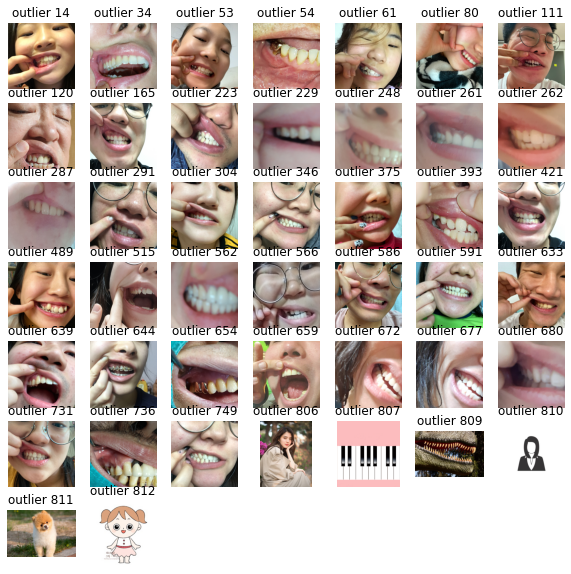

In [42]:
plt.figure(figsize=(10,10))

for i in range(len(valid_outlier)):
    n = np.ceil(np.sqrt(len(valid_outlier)))
    plt.subplot(n,n,i+1)
    plt.imshow(cv2.cvtColor(valid2[valid_outlier[i]], cv2.COLOR_BGR2RGB))
    plt.title(f'outlier {valid_outlier[i]}')
    plt.axis('off')
    
plt.show()



<IPython.core.display.Javascript object>


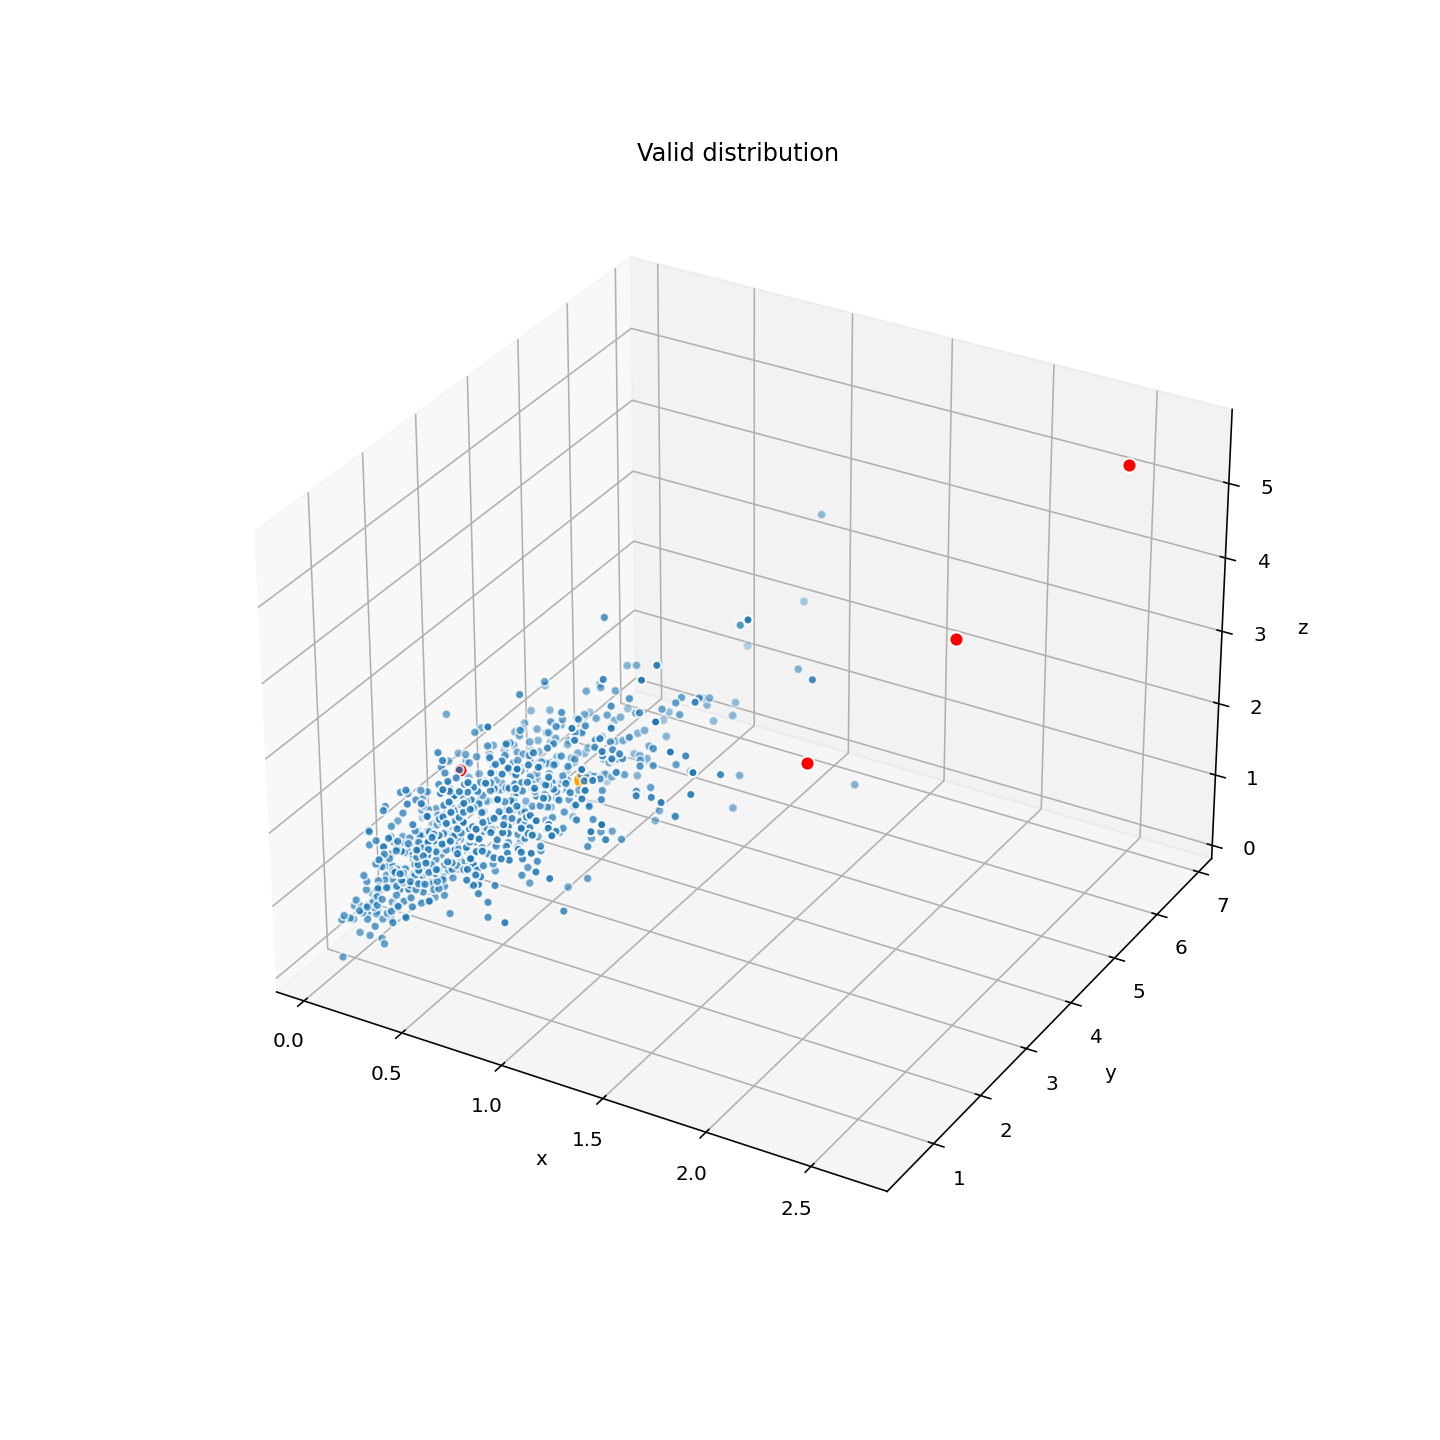

In [55]:
# visualize the test set distribution using pca
%matplotlib notebook

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

# normal data
ax.scatter(valid_2d[:-12,0], valid_2d[:-12,1], valid_2d[:-12,2],
           s=20,
           edgecolor='white')
for i in range(1,5+1):
    ax.scatter(valid_2d[-i,0], valid_2d[-i,1], valid_2d[-i,2],
               s=50,
               color='red',
               edgecolor='white')
ax.scatter(valid_2d[-5,0], valid_2d[-5,1], valid_2d[-5,2],
           s=70,
           color='orange',
           edgecolor='white')
ax.set_title('Valid distribution')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# TEST 결과

In [44]:
# again modeling
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(n_estimators=80,
                          max_samples=500,
                          max_features=20,
                          contamination='auto',
                          random_state=42)
iforest.fit(train_2d)
test_pred = iforest.predict(test_2d)

<IPython.core.display.Javascript object>


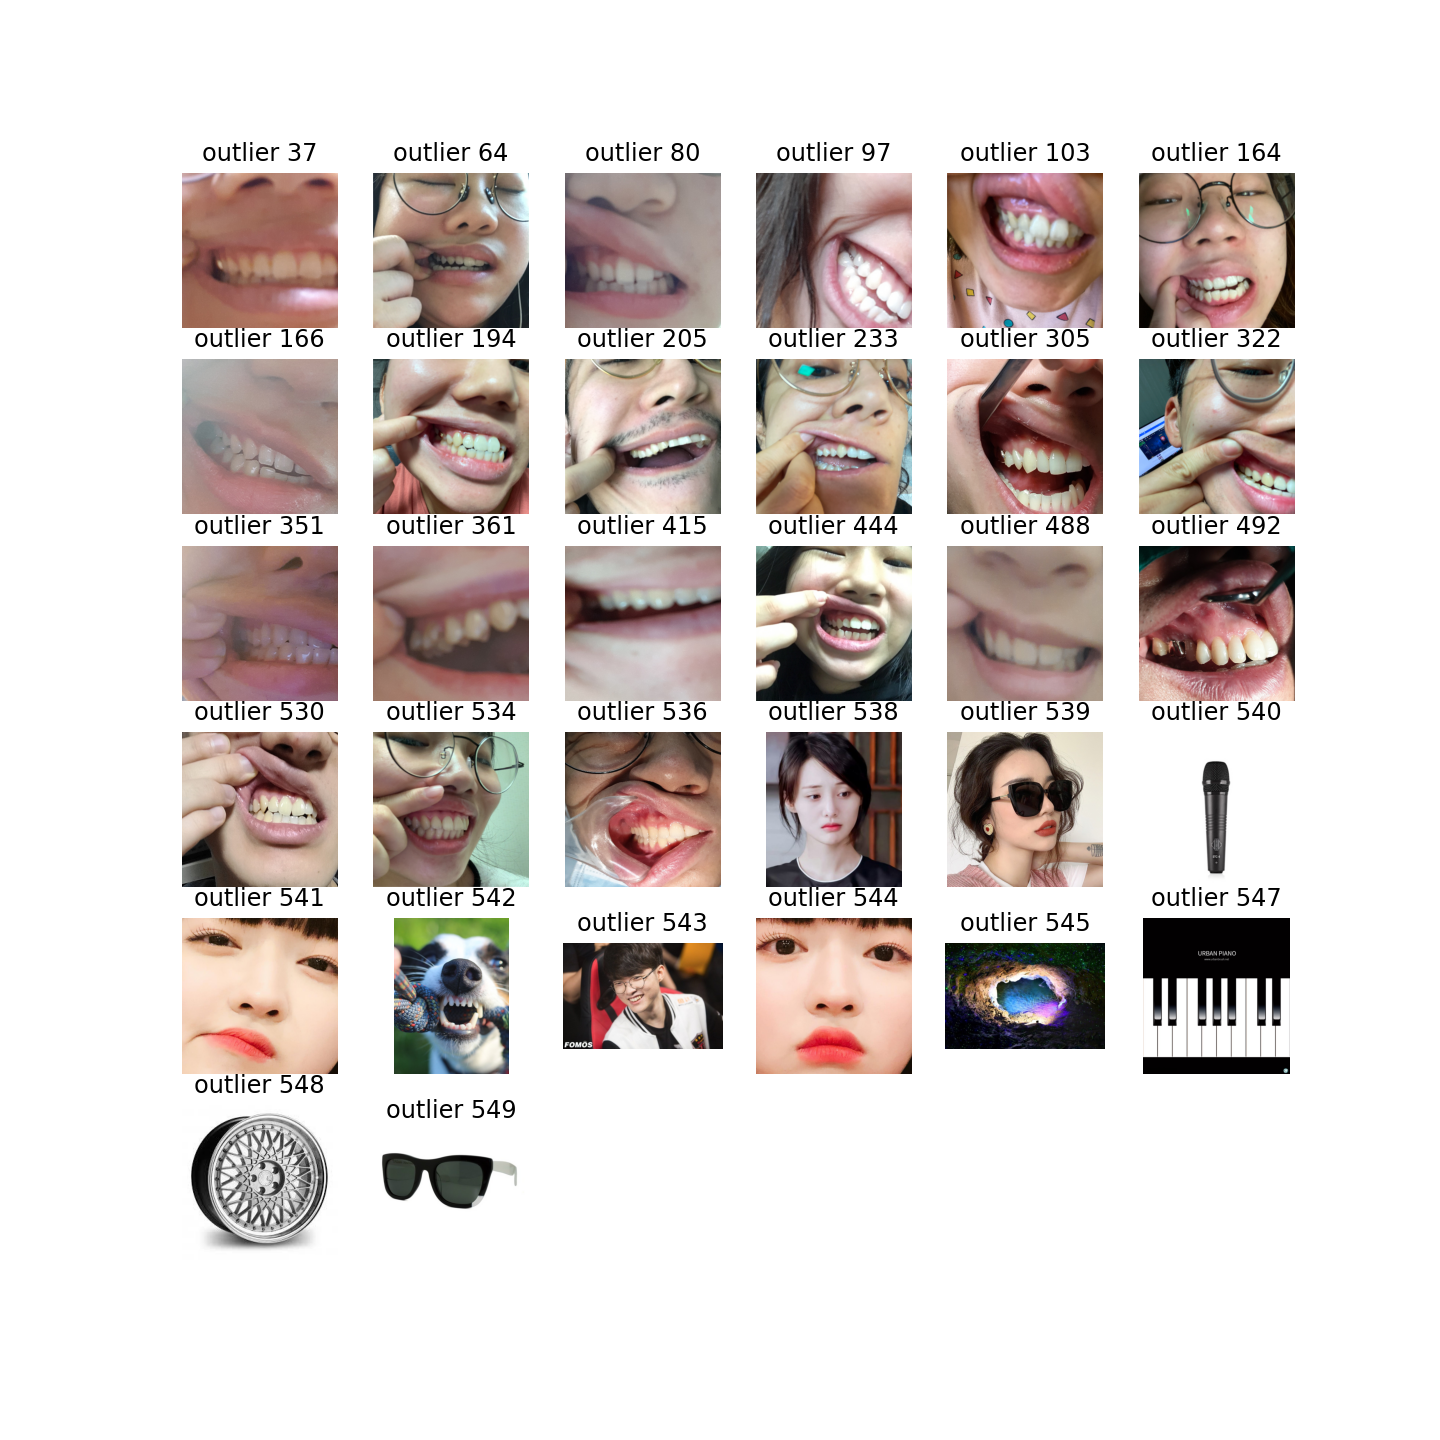

/var/folders/f4/fb3b_sqx3rvc3gfr73v6ck_00000gn/T/ipykernel_3540/63102973.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n,n,i+1)


In [56]:
test_result = pd.DataFrame(test_pred, columns=['value'])

test_outlier = test_result[test_result.value==-1].index

plt.figure(figsize=(10,10))

for i in range(len(test_outlier)):
    n = np.ceil(np.sqrt(len(test_outlier)))
    plt.subplot(n,n,i+1)
    plt.imshow(cv2.cvtColor(test2[test_outlier[i]], cv2.COLOR_BGR2RGB))
    plt.title(f'outlier {test_outlier[i]}')
    plt.axis('off')
    
plt.show()

<IPython.core.display.Javascript object>


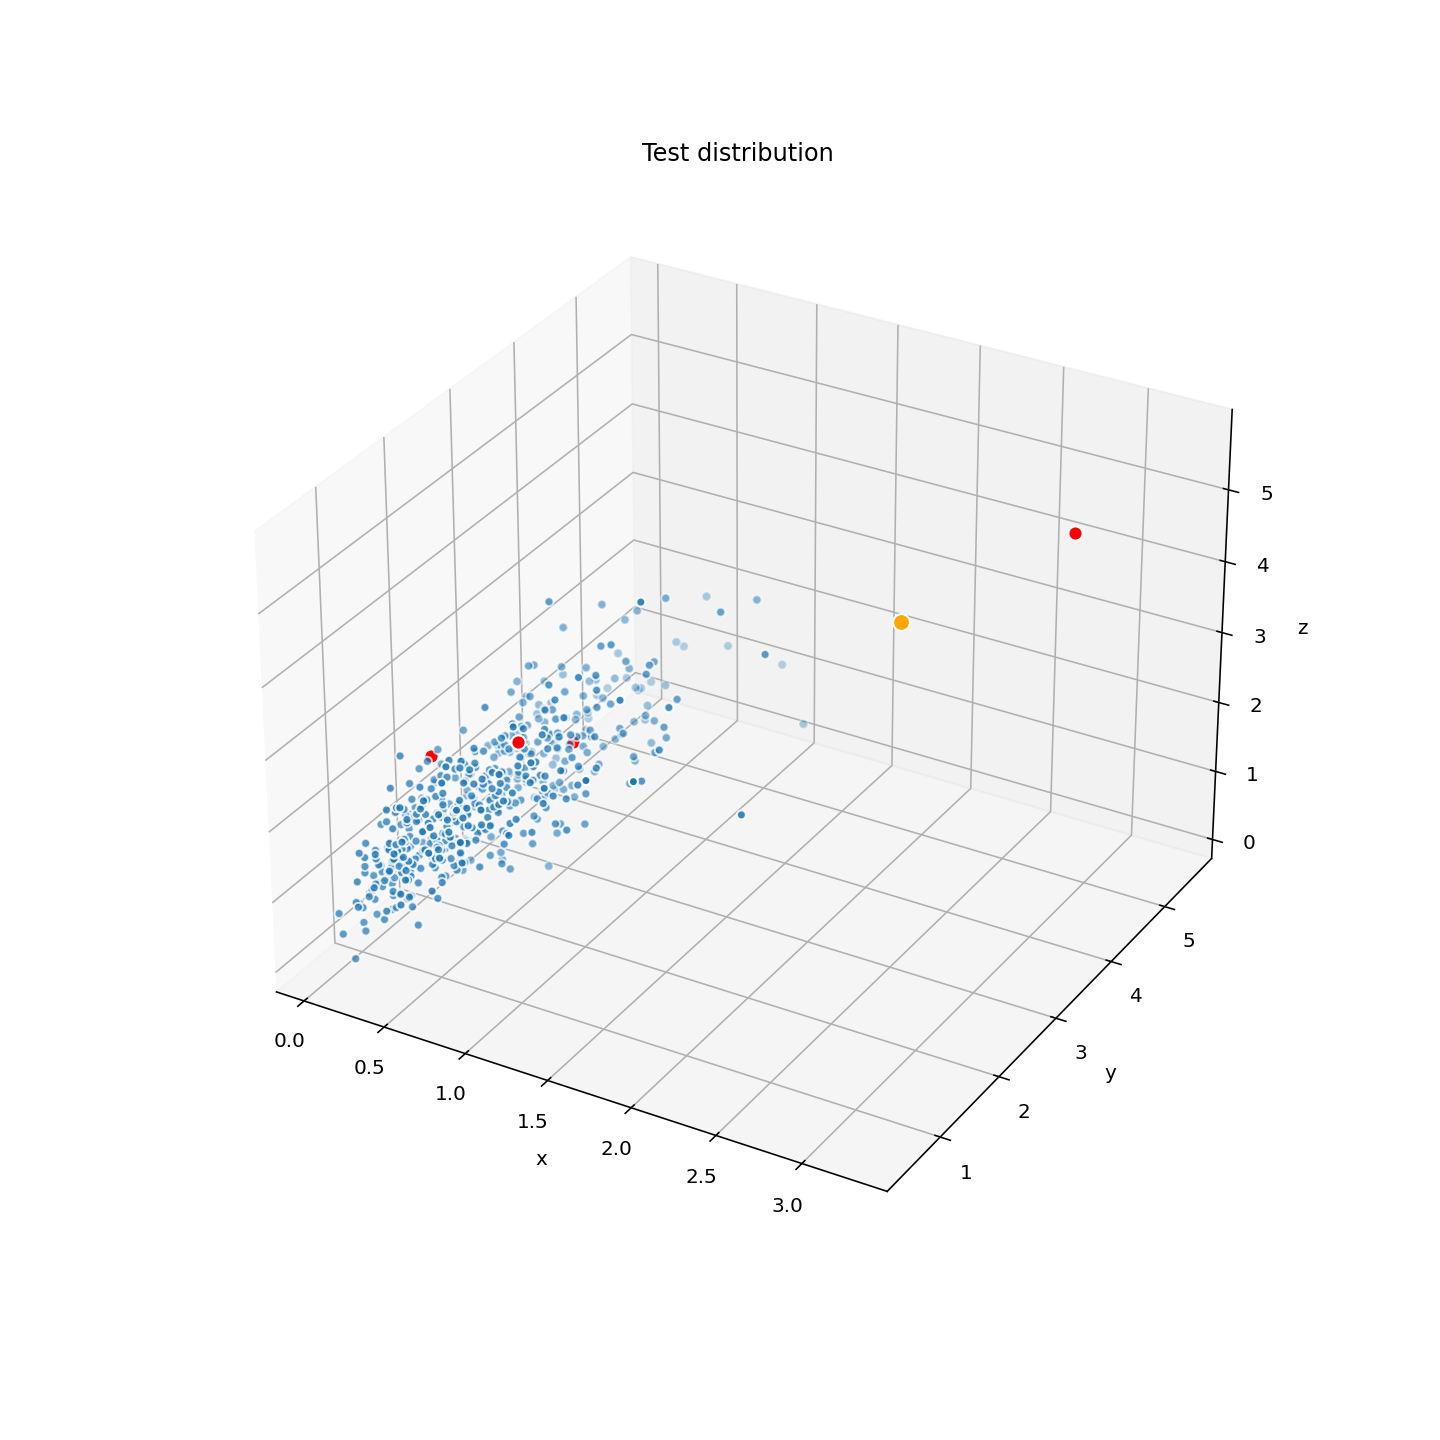

In [46]:
# visualize the test set distribution using pca
%matplotlib notebook

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

# normal data
ax.scatter(test_2d[:-12,0], test_2d[:-12,1], test_2d[:-12,2],
           s=20,
           edgecolor='white')
for i in range(1,5+1):
    ax.scatter(test_2d[-i,0], test_2d[-i,1], test_2d[-i,2],
               s=50,
               color='red',
               edgecolor='white')
ax.scatter(test_2d[-5,0], test_2d[-5,1], test_2d[-5,2],
           s=70,
           color='orange',
           edgecolor='white')
ax.set_title('Test distribution')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [47]:
# again modeling
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(n_estimators=500,
                          max_samples=100,
                          max_features=10,
                          contamination='auto',
                          random_state=42)
iforest.fit(train_2d)
test_pred2 = iforest.predict(test_2d)

<IPython.core.display.Javascript object>


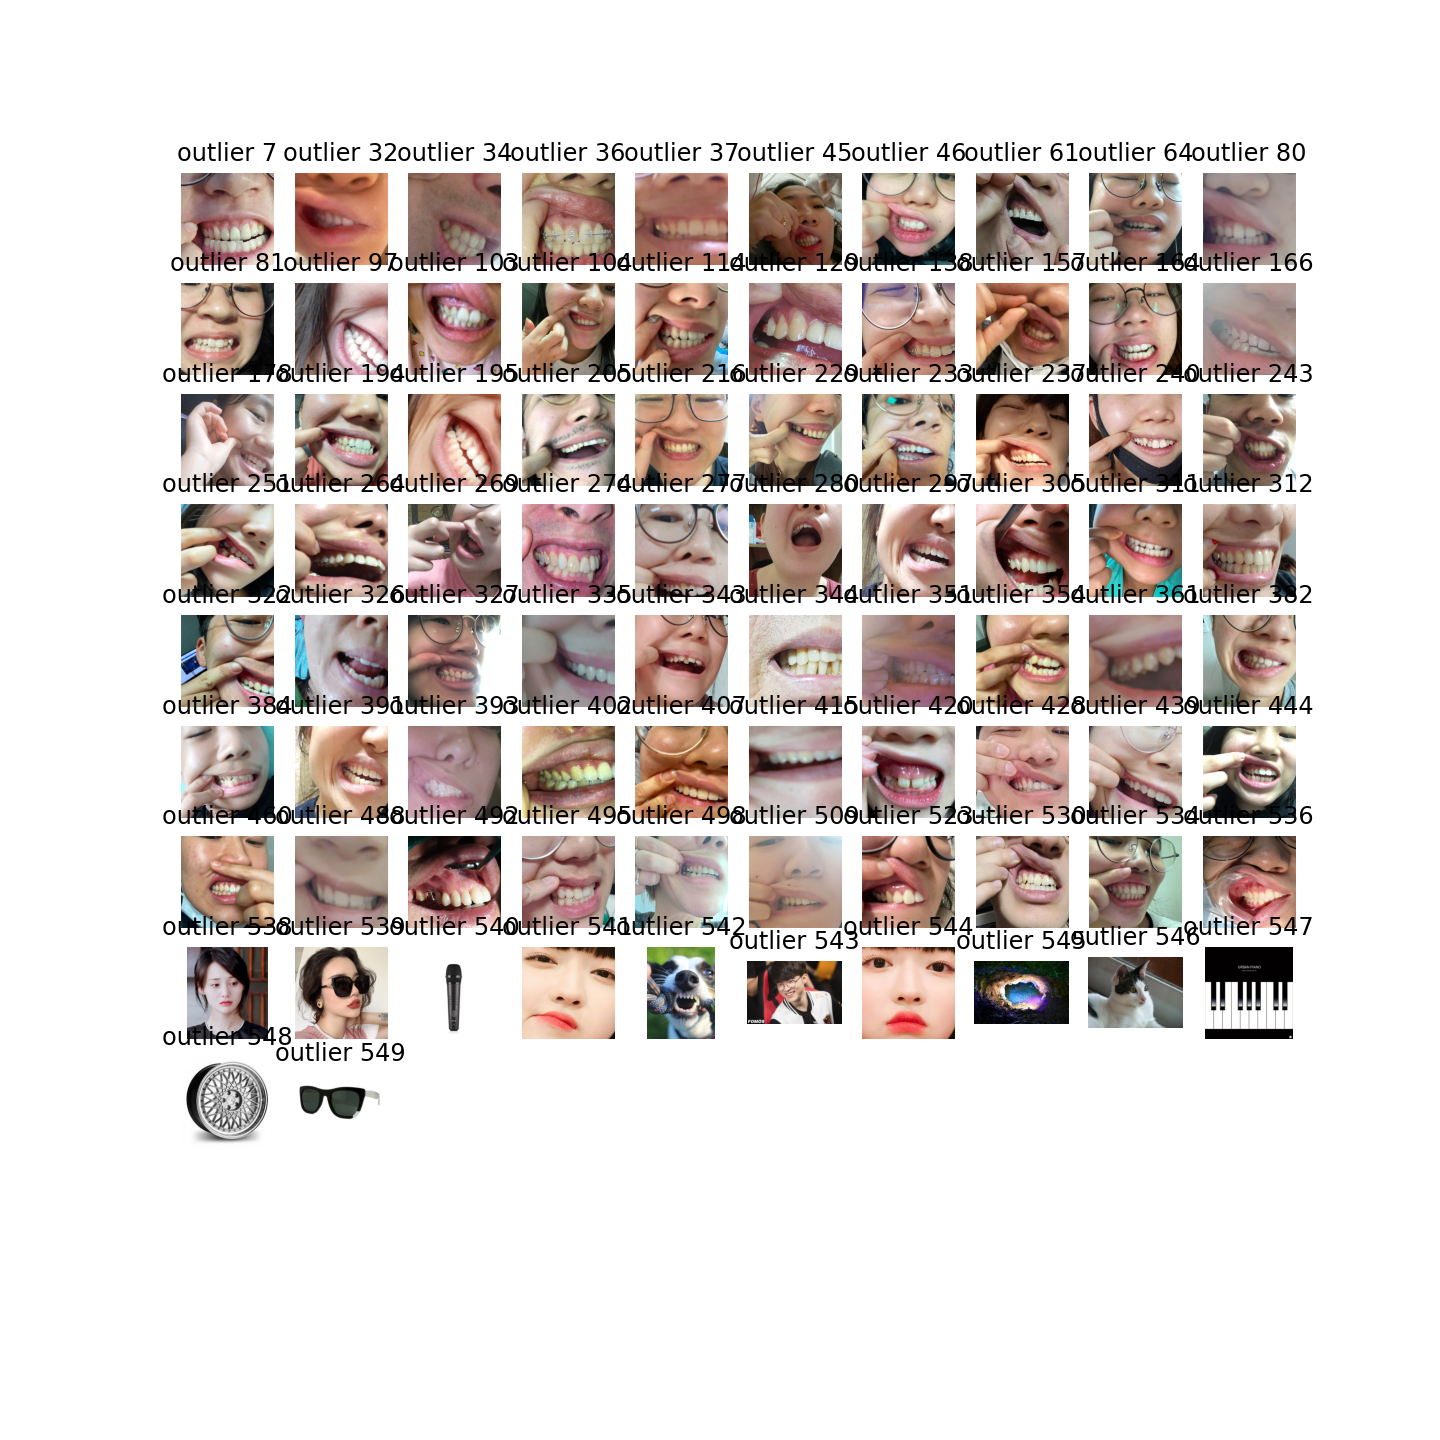

/var/folders/f4/fb3b_sqx3rvc3gfr73v6ck_00000gn/T/ipykernel_3540/2019093314.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n,n,i+1)


In [48]:
test_result = pd.DataFrame(test_pred2, columns=['value'])

test_outlier = test_result[test_result.value==-1].index

plt.figure(figsize=(10,10))

for i in range(len(test_outlier)):
    n = np.ceil(np.sqrt(len(test_outlier)))
    plt.subplot(n,n,i+1)
    plt.imshow(cv2.cvtColor(test2[test_outlier[i]], cv2.COLOR_BGR2RGB))
    plt.title(f'outlier {test_outlier[i]}')
    plt.axis('off')
    
plt.show()

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

In [50]:

# valid label
valid_true = np.ones(len(valid_2d))
valid_true[-7:] = -1
valid_pred = valid_pred

# test label
test_true = np.ones(len(test_2d))
test_true[-12:] = -1
test_pred = test_pred

# test label
test_true2 = np.ones(len(test_2d))
test_true2[-12:] = -1
test_pred2 = test_pred2




In [51]:

print('confusion matrix of valid set:')
print(confusion_matrix(valid_true, valid_pred))
print('---------------------------------')
print('confusion matrix of test set:')
print(confusion_matrix(test_true, test_pred))
print('---------------------------------')
print('confusion matrix of test set:')
print(confusion_matrix(test_true2, test_pred2))
print('---------------------------------')

confusion matrix of valid set:
[[  6   1]
 [ 38 768]]
---------------------------------
confusion matrix of test set:
[[ 11   1]
 [ 21 517]]
---------------------------------
confusion matrix of test set:
[[ 12   0]
 [ 70 468]]
---------------------------------


In [52]:
# valid score
valid_report_result = classification_report(valid_true,
                                            valid_pred,
                                            target_names=['anomaly', 'normal'])
print(valid_report_result)

              precision    recall  f1-score   support

     anomaly       0.14      0.86      0.24         7
      normal       1.00      0.95      0.98       806

    accuracy                           0.95       813
   macro avg       0.57      0.90      0.61       813
weighted avg       0.99      0.95      0.97       813



In [53]:
# test score
test_report_result = classification_report(test_true,
                                           test_pred,
                                           target_names=['anomaly', 'normal'])
print(test_report_result)

              precision    recall  f1-score   support

     anomaly       0.34      0.92      0.50        12
      normal       1.00      0.96      0.98       538

    accuracy                           0.96       550
   macro avg       0.67      0.94      0.74       550
weighted avg       0.98      0.96      0.97       550



In [54]:
# test score
test_report_result2 = classification_report(test_true2,
                                           test_pred2,
                                           target_names=['anomaly', 'normal'])
print(test_report_result2)

              precision    recall  f1-score   support

     anomaly       0.15      1.00      0.26        12
      normal       1.00      0.87      0.93       538

    accuracy                           0.87       550
   macro avg       0.57      0.93      0.59       550
weighted avg       0.98      0.87      0.92       550

